In [104]:
import pandas as pd
import keras
import numpy as np
from sklearn.metrics import classification_report

In [37]:
import tensorflow as tf

In [12]:
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')

In [13]:
train_data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
import keras

In [16]:
y1 = np.array(train_data.iloc[:,0].values)
x1 = np.array(train_data.iloc[:,1:].values)

In [97]:
y1

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [19]:
x1.shape

(42000, 784)

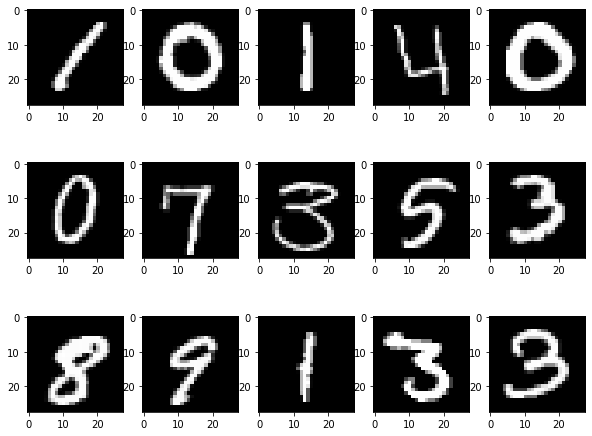

In [20]:
import matplotlib.pyplot as plt 
fig,axes = plt.subplots(3,5,figsize=(10,8))
for i,ax in enumerate(axes.flat):
    ax.imshow(x1[i].reshape([28,28]), cmap='gray')

In [23]:
train_data.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


# Preprocessing

In [64]:
np.unique(x1).max()

1.0

In [40]:
np.unique(y1)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [33]:
#x1 normalization 
x1 = x1/255

#reshape de l'image
nb_image = x1.shape[0]
heigth = 28
width = 28
train_image = heigth * width
x1 = x1.reshape(nb_image, heigth, width, 1)


#adding categorical 
y1 = tf.keras.utils.to_categorical(y1, 10)

In [66]:
x1.shape

(42000, 28, 28, 1)

In [183]:
y1[0]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [79]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [139]:
def validation_curve(hist):
    
    plt.figure(figsize=(10,10))
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'Validation'], loc='upper left')
    plt.show()
    
def validation_accuracy_curve(hist):
    
    plt.figure(figsize=(10,10))
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'Validation'], loc='upper left')
    plt.show()

# Debut de l'architecture

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=.3, random_state=1)

In [52]:
print(X_train.shape)
print(y_train.shape)

(29400, 28, 28, 1)
(29400, 10)


In [106]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import MaxPooling2D

import keras.backend as K
from keras.callbacks import Callback
from tensorflow import keras

In [55]:
input_dim = X_train.shape[1:]

In [99]:
X_train.shape[1:]

(28, 28, 1)

In [98]:
input_dim

(28, 28, 1)

In [372]:
callback = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

In [373]:
model = Sequential()
#input layer
model.add(Conv2D(64,(3,3), input_shape=input_dim)) 


#hidden layers
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(16,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(16,(3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(32, activation='relu'))
#outpout layer
model.add(Dense(10, activation='softmax'))

In [374]:
model.summary()

Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_84 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_45 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_85 (Conv2D)          (None, 11, 11, 16)        9232      
                                                                 
 max_pooling2d_46 (MaxPoolin  (None, 5, 5, 16)         0         
 g2D)                                                            
                                                                 
 conv2d_86 (Conv2D)          (None, 3, 3, 16)          2320      
                                                                 
 flatten_33 (Flatten)        (None, 144)             

In [375]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')

In [376]:
validation_split = 0.2
history = model.fit(X_train, y_train, validation_split=validation_split, batch_size=64, epochs=25, callbacks=callback) 

Epoch 1/25
368/368 [==============================] - 20s 52ms/step - loss: 0.5574 - accuracy: 0.8211 - val_loss: 0.1854 - val_accuracy: 0.9451
Epoch 2/25
368/368 [==============================] - 19s 52ms/step - loss: 0.1439 - accuracy: 0.9555 - val_loss: 0.1274 - val_accuracy: 0.9604
Epoch 3/25
368/368 [==============================] - 19s 52ms/step - loss: 0.1054 - accuracy: 0.9668 - val_loss: 0.1077 - val_accuracy: 0.9662
Epoch 4/25
368/368 [==============================] - 19s 52ms/step - loss: 0.0835 - accuracy: 0.9736 - val_loss: 0.0943 - val_accuracy: 0.9709
Epoch 5/25
368/368 [==============================] - 20s 53ms/step - loss: 0.0670 - accuracy: 0.9785 - val_loss: 0.0822 - val_accuracy: 0.9707
Epoch 6/25
368/368 [==============================] - 19s 53ms/step - loss: 0.0602 - accuracy: 0.9805 - val_loss: 0.0782 - val_accuracy: 0.9757
Epoch 7/25
368/368 [==============================] - 20s 54ms/step - loss: 0.0557 - accuracy: 0.9812 - val_loss: 0.0749 - val_accuracy:

In [377]:
y_pred = model.predict(X_test)

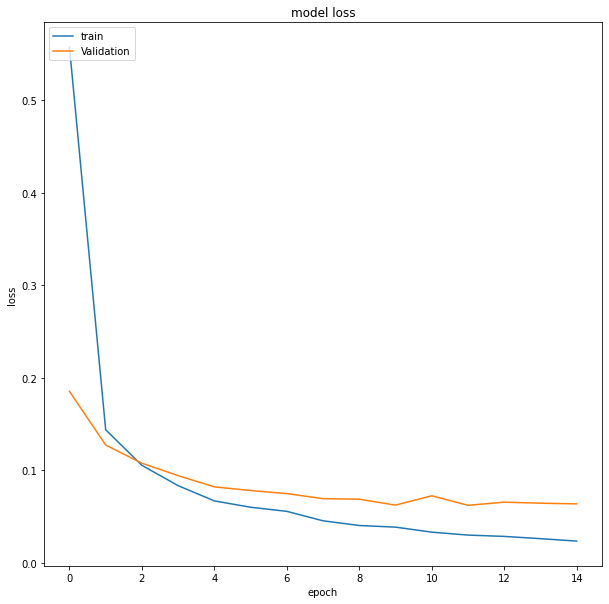

In [378]:
validation_curve(history)

In [379]:
y_pred

array([[1.63223449e-10, 9.99989510e-01, 1.39061638e-06, ...,
        2.92221171e-06, 3.37175334e-06, 4.74852657e-10],
       [4.22608082e-14, 4.70055495e-10, 3.55678994e-14, ...,
        4.12042622e-11, 6.71285250e-08, 1.08288805e-06],
       [3.20742828e-07, 1.81635551e-06, 9.99997139e-01, ...,
        1.66122804e-09, 2.33374294e-07, 3.62289393e-10],
       ...,
       [1.02954374e-07, 2.49988674e-09, 9.99999762e-01, ...,
        7.07283928e-12, 2.78796342e-09, 5.95998468e-12],
       [3.08259196e-09, 2.45180534e-08, 3.19049498e-08, ...,
        1.97775847e-07, 8.32445153e-07, 5.30692614e-06],
       [9.99984741e-01, 6.09388787e-13, 3.75328909e-06, ...,
        7.79159836e-06, 1.20189583e-07, 3.62363357e-06]], dtype=float32)

In [380]:
print(classification_report(y_test, np.around(y_pred)))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1247
           1       0.99      1.00      0.99      1395
           2       0.97      0.98      0.98      1257
           3       0.99      0.98      0.99      1321
           4       0.99      0.97      0.98      1232
           5       0.99      0.97      0.98      1111
           6       0.99      0.99      0.99      1258
           7       0.98      0.98      0.98      1285
           8       0.98      0.98      0.98      1249
           9       0.97      0.97      0.97      1245

   micro avg       0.98      0.98      0.98     12600
   macro avg       0.98      0.98      0.98     12600
weighted avg       0.98      0.98      0.98     12600
 samples avg       0.98      0.98      0.98     12600



C:\Users\utilisateur\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


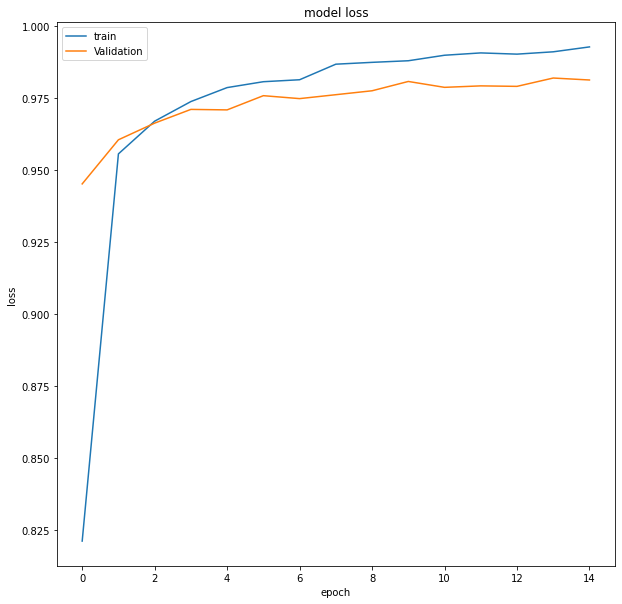

In [381]:
validation_accuracy_curve(history)